In [30]:
# sklearn necesita una version de numpy anterior a numpy 2
!pip install "numpy<2"
!pip install "opencv-python"
!pip install "scikit-learn"
!pip install "seaborn"
!pip install "tensorflow"

import cv2
import os
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import layers, models

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.8 MB 1.9 MB/s eta 0:02:59
   ---------------------------------------- 1.0/331.8 MB 1.7 MB/s eta 0:03:18
   ---------------------------------------- 1.6/331.8 MB 1.9 MB/s eta 0:02:54
   ---------------------------------------- 2.1/331.8 MB 2.1 MB/s eta 0:02:41
   ---------------------------------------- 2.6/331.8 MB 2.1 MB/s eta 0:02:35
   ---------------------------------------- 3.1/331.8 MB 2.2 MB/s eta 0:02:28
   ---------------------------------------- 3.7/331.8 MB 2.3 MB/s eta 0:02:22
    --------------------------

In [31]:
# función para cargar las imagenes de entrenamiento
def cargar_datos(data_dir):
    X = []
    y = []
    for class_name in ['margaritas', 'lirios', 'rosas']:
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = Image.open(file_path).convert('RGB')  # Convert to grayscale
            image = image.resize((64, 64))  # Resize to a fixed size
            image = np.array(image)
            X.append(image)
            y.append(class_name)
    return np.array(X), np.array(y)

# Carga los datos, x tiene los datos y y tiene las etiquetas (los )
data_dir = 'imagenes'
x, y = cargar_datos(data_dir)

# los valores de los pixeles se hacen mas pequenos para aumentar la precision
#x = x / 255.0
x = x.astype('float32') / 255.0

In [32]:
# Codifica las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dicide los datos entre los de entrenamiento y los de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
model = models.Sequential([
    # Capas de aumento de datos
    # "Genera" nuevas imagenes con ligeras diferencias a las originasles 
    # para tener más datos y evitar aprender el ruido de las imagenes 
    layers.Input(shape=(64, 64, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1), # Rota un 10%
    layers.RandomZoom(0.1),     # Zoom un 10%

    # Capas convolucionales
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Capas de clasificación
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Apaga neuronas al azar para evitar memorización
    layers.Dense(3, activation='softmax') # 3 neuronas de salida (una por flor)
])

# Compila el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Entrenando Red Neuronal...")
# Entrena por 50 épocas
history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test), verbose=1)

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

Entrenando Red Neuronal...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4615 - loss: 1.0935 - val_accuracy: 0.5769 - val_loss: 0.8727
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5673 - loss: 0.9252 - val_accuracy: 0.6538 - val_loss: 0.7146
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6346 - loss: 0.7212 - val_accuracy: 0.5385 - val_loss: 0.8536
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6250 - loss: 0.7553 - val_accuracy: 0.6154 - val_loss: 0.6442
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6442 - loss: 0.7214 - val_accuracy: 0.6538 - val_loss: 0.5580
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6827 - loss: 0.6370 - val_accuracy: 0.8462 - val_loss: 0.5395
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7788 - loss: 0.6022 - val_accuracy: 0.6538 - val_loss: 0.5117
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7019 - loss: 0.5979 - val_accuracy:

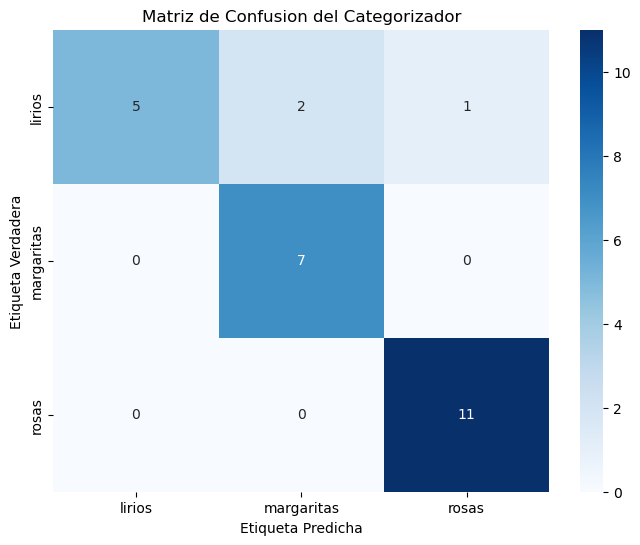

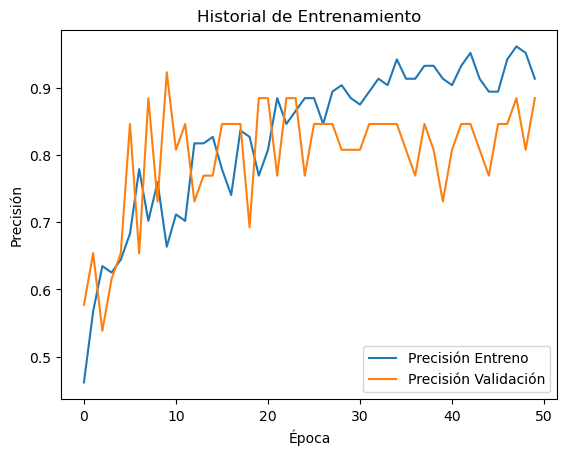

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# calculamos nuestra matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# recuperamos los nombres originales de las clases (para visualizacion de los datos)
class_names = label_encoder.classes_ 

# visualizamos la matriz de confusion usando un mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusion del Categorizador')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Gráfica de aprendizaje a lo largo de las épocas
plt.plot(history.history['accuracy'], label='Precisión Entreno')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Historial de Entrenamiento')
plt.show()
